In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


from google.colab.patches import cv2_imshow

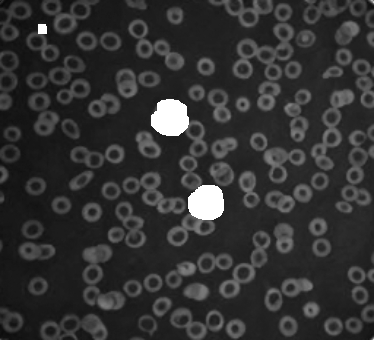

In [ ]:
#load image

image=cv2.imread("/content/blood_sample_3.JPG")
image=cv2.resize(image,(374,340))
crop=image[58:(57+222),58:(57+257)]
crop=cv2.resize(crop,(374,340))
lab=cv2.cvtColor(crop,cv2.COLOR_BGR2LAB)
l,a,b = cv2.split(lab)


th=0
max_val=255
ret,th=cv2.threshold(b,106,255,cv2.THRESH_BINARY)


k=np.ones((6,6),np.uint8)
opening=cv2.morphologyEx(th,cv2.MORPH_OPEN,k)

k=np.array(
    [[0, 1, 1, 1, 0], 
     [1, 1, 1, 1, 1],
     [1, 1, 1, 1, 1],
     [1, 1, 1, 1, 1],
     [0, 1, 1, 1, 0]],np.uint8)
erode=cv2.erode(opening,k)


k = np.ones((8,8),np.uint8)
erode_two = cv2.erode(opening,k)

erode_two = cv2.resize(erode_two,(374,340))


erode_inv= cv2.bitwise_not(erode_two)


hsv=cv2.cvtColor(crop,cv2.COLOR_BGR2HSV)
h, s, v = hsv[:, :, 0], hsv[:, :, 1], hsv[:, :, 2]
s = cv2.resize(s,(374,340))


wbc = cv2.addWeighted(s,1,erode_inv,1,0)
wbc = cv2.resize(wbc,(374,340))
cv2_imshow(wbc)

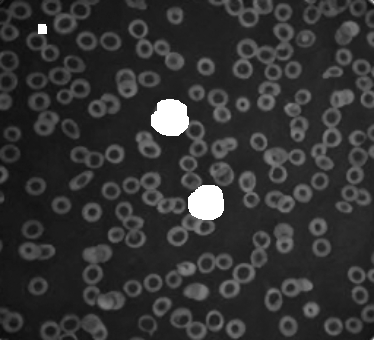

In [ ]:
bgr=cv2.cvtColor(wbc,cv2.COLOR_GRAY2BGR)
cv2_imshow(bgr)

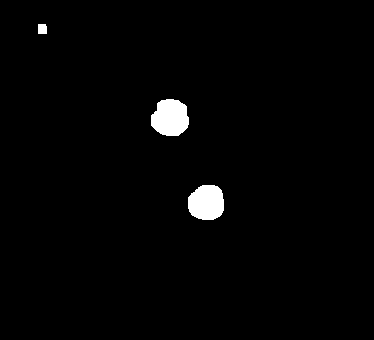

In [ ]:
ret,thresh_1= cv2.threshold(bgr,241,255,cv2.THRESH_BINARY)
cv2_imshow(thresh_1)


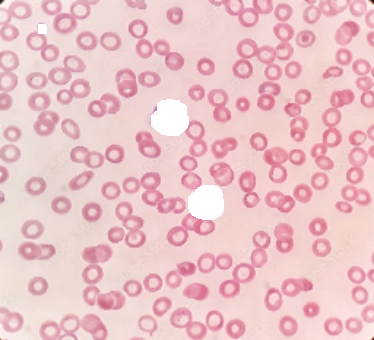

In [ ]:
wbc_removal=cv2.addWeighted(crop,1,thresh_1,1.,0)
cv2_imshow(wbc_removal)

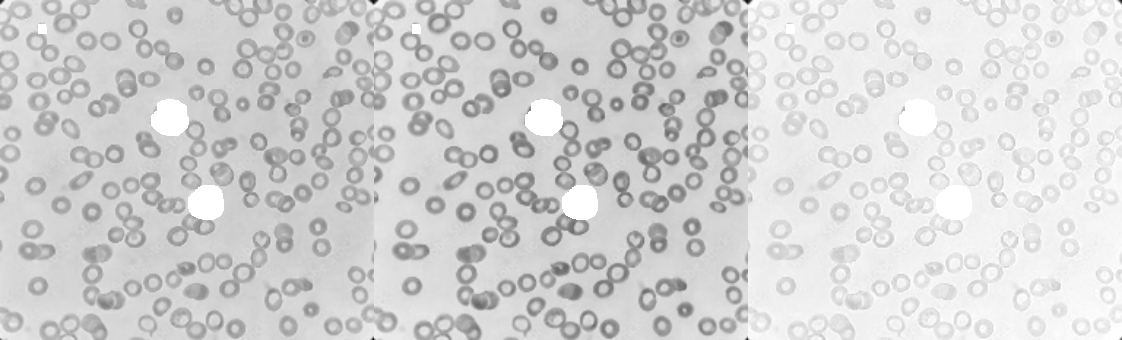

In [ ]:
l_rbc,a_rbc,b_rbc = cv2.split(wbc_removal)
lab_hstack_rbc= np.hstack((l_rbc,a_rbc,b_rbc))
cv2_imshow(lab_hstack_rbc)


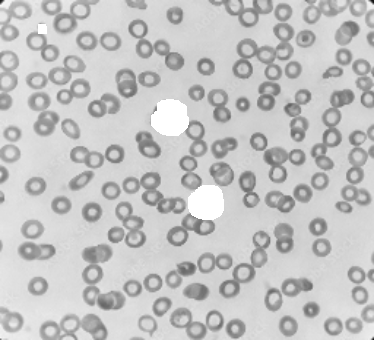

In [ ]:
cv2_imshow(a_rbc)

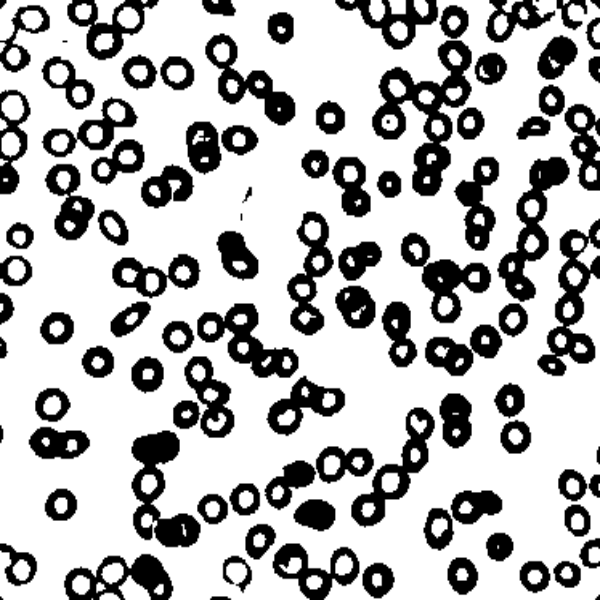

In [ ]:

th=0
max_val=255
ret,otsu_rbc = cv2.threshold(a_rbc,th,max_val,cv2.THRESH_BINARY+ cv2.THRESH_OTSU)

otsu_rbc = cv2.resize(otsu_rbc,(600,600))
cv2_imshow(otsu_rbc)



# ret, otsu_rbc= cv2.threshold(a_rbc,241,255,cv2.THRESH_BINARY)
# otsu_rbc = cv2.resize(otsu_rbc,(600,600))
# cv2_imshow(otsu_rbc)


#threshhold = 100

In [ ]:
# canny_rbc = cv2.Canny(otsu_rbc, 100, 200)

# canny_rbc = cv2.resize(canny_rbc,(600,600))
# cv2_imshow(canny_rbc)

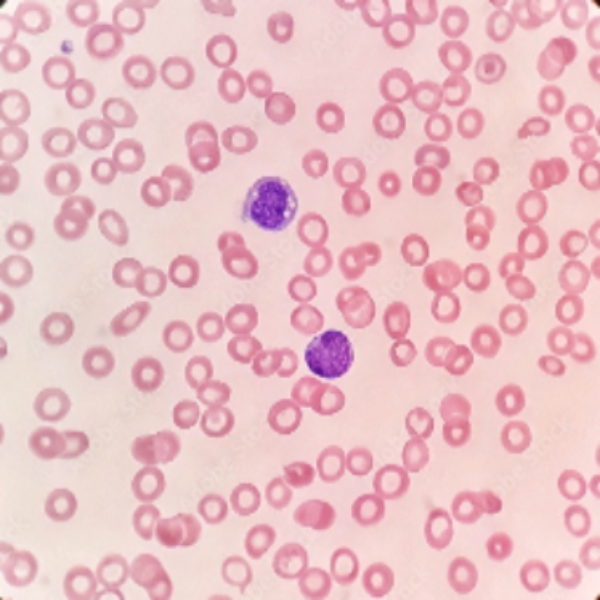

In [ ]:
image_big=cv2.resize(crop,(600,600))
cv2_imshow(image_big)

In [ ]:
rbc_circles=cv2.HoughCircles(otsu_rbc, cv2.HOUGH_GRADIENT,1,13.7,
                          param1=200,param2=6, minRadius=12, maxRadius=15)


#dt=10, param2=7, minRadius=12, maxRadius=15

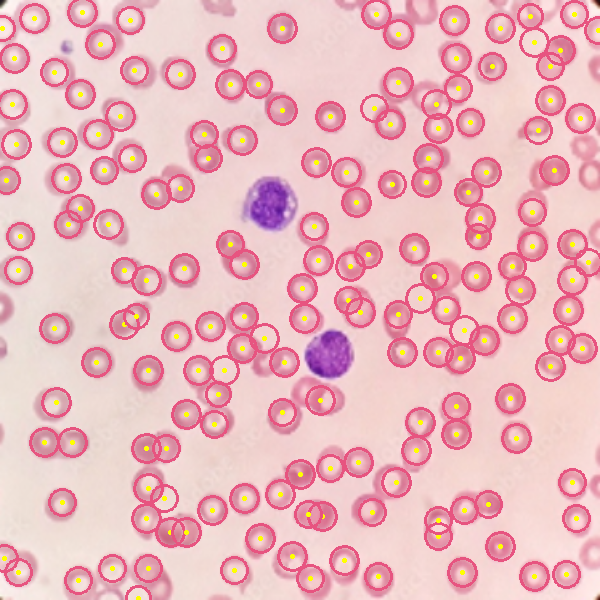

In [ ]:
if rbc_circles is not None:
  detected_circles=np.uint16(np.around(rbc_circles))

  
for (x, y ,r) in detected_circles[0, :]:
    cv2.circle(image_big, (x, y), r, (128,84,231), 2)
    cv2.circle(image_big, (x, y), 1, (0, 255, 255), 2)
cv2_imshow(image_big)

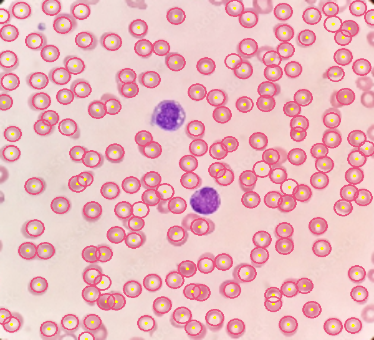

In [ ]:
image_big=cv2.resize(image_big,(374,340))
cv2_imshow(image_big)

In [ ]:
rbc_num=detected_circles.shape[1]
print("Number of detected RBCs: ",rbc_num)

Number of detected RBCs:  171
